-sandbox

<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://databricks.com/wp-content/uploads/2018/03/db-academy-rgb-1200px.png" alt="Databricks Learning" style="width: 600px">
</div>

# MLflow

#### <a href="https://mlflow.org/docs/latest/concepts.html" target="_blank">MLflow</a> seeks to address these **three core issues:**

* **It’s difficult to keep track of experiments**
* **It’s difficult to reproduce code**
* **There’s no standard way to package and deploy models**

- **In the past, when examining a problem, you would have to manually keep track of the many models you created, as well as their associated parameters and metrics. This can quickly become tedious and take up valuable time, which is where MLflow comes in.**

- **MLflow is pre-installed on the Databricks Runtime for ML.**

## ![Spark Logo Tiny](https://files.training.databricks.com/images/105/logo_spark_tiny.png) In this lesson you:<br>
* **Use MLflow to track experiments, log metrics, and compare runs**

<div><img src="https://files.training.databricks.com/images/eLearning/ML-Part-4/mlflow-tracking.png" style="height: 400px; margin: 20px"/></div>

In [0]:
%pip install mlflow

Python interpreter will be restarted.
Collecting mlflow
 Downloading mlflow-1.28.0-py3-none-any.whl (17.0 MB)
Collecting cloudpickle<3
 Downloading cloudpickle-2.1.0-py3-none-any.whl (25 kB)
Collecting databricks-cli<1,>=0.8.7
 Downloading databricks-cli-0.17.2.tar.gz (81 kB)
Collecting click<9,>=7.0
 Downloading click-8.1.3-py3-none-any.whl (96 kB)
Requirement already satisfied: pytz<2023 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (2020.5)
Collecting docker<6,>=4.0.0
 Downloading docker-5.0.3-py2.py3-none-any.whl (146 kB)
Collecting sqlparse<1,>=0.4.0
 Downloading sqlparse-0.4.2-py3-none-any.whl (42 kB)
Requirement already satisfied: entrypoints<1 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (0.3)
Requirement already satisfied: requests<3,>=2.17.3 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (2.25.1)
Requirement already satisfied: numpy<2 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.20.1)
Requirement already satisfied: pandas<2 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.2.4)
Requirement already satisfied: protobuf<5,>=3.12.0 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (3.17.2)
Collecting prometheus-flask-exporter<1
 Downloading prometheus_flask_exporter-0.20.3-py3-none-any.whl (18 kB)
Collecting pyyaml<7,>=5.1
 Downloading PyYAML-6.0-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (701 kB)
Collecting alembic<2
 Downloading alembic-1.8.1-py3-none-any.whl (209 kB)
Collecting gitpython<4,>=2.1.0
 Downloading GitPython-3.1.27-py3-none-any.whl (181 kB)
Requirement already satisfied: scipy<2 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.6.2)
Collecting sqlalchemy<2,>=1.4.0
 Downloading SQLAlchemy-1.4.40-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.6 MB)
Collecting gunicorn<21
 Downloading gunicorn-20.1.0-py3-none-any.whl (79 kB)
Collecting importlib-metadata!=4.7.0,<5,>=3.7.0
 Downloading importlib_metadata-4.12.0-py3-none-any.whl (21 kB)
Requirement already satisfied: packaging<22 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (20.9)
Collecting Flask<3
 Downloading Flask-2.2.2-py3-none-any.whl (101 kB)
Collecting querystring-parser<2
 Downloading querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
Collecting importlib-resources
 Downloading importlib_resources-5.9.0-py3-none-any.whl (33 kB)
Collecting Mako
 Downloading Mako-1.2.1-py3-none-any.whl (78 kB)
Collecting pyjwt>=1.7.0
 Downloading PyJWT-2.4.0-py3-none-any.whl (18 kB)
Collecting oauthlib>=3.1.0
 Downloading oauthlib-3.2.0-py3-none-any.whl (151 kB)
Collecting tabulate>=0.7.7
 Downloading tabulate-0.8.10-py3-none-any.whl (29 kB)
Requirement already satisfied: six>=1.10.0 in /databricks/python3/lib/python3.8/site-packages (from databricks-cli<1,>=0.8.7->mlflow) (1.15.0)
Collecting websocket-client>=0.32.0
 Downloading websocket_client-1.4.0-py3-none-any.whl (54 kB)
Collecting itsdangerous>=2.0
 Downloading itsdangerous-2.1.2-py3-none-any.whl (15 kB)
Collecting Jinja2>=3.0
 Downloading Jinja2-3.1.2-py3-none-any.whl (133 kB)
Collecting Werkzeug>=2.2.2
 Downloading Werkzeug-2.2.2-py3-none-any.whl (232 kB)
Collecting gitdb<5,>=4.0.1
 Downloading gitdb-4.0.9-py3-none-any.whl (63 kB)
Collecting smmap<6,>=3.0.1
 Downloading smmap-5.0.0-py3-none-any.whl (24 kB)
Requirement already satisfied: setuptools>=3.0 in /usr/local/lib/python3.8/dist-packages (from gunicorn<21->mlflow) (52.0.0)
Collecting zipp>=0.5
 Downloading zipp-3.8.1-py3-none-any.whl (5.6 kB)
Requirement already satisfied: MarkupSafe>=2.0 in /databricks/python3/lib/python3.8/site-packages (from Jinja2>=3.0->Flask<3->mlflow) (2.0.1)
Requirement already satisfied: pyparsing>=2.0.2 in /databricks/python3/lib/python3.8/site-packages (from packaging<22->mlflow) (2.4.7)
Requirement already satisfied: python-dateutil>=2.7.3 in /databricks/python3/lib/python3

In [0]:
%run "./Includes/Classroom-Setup"

Defining courseware-specific utility methods...

The source for this dataset is
wasbs://courseware@dbacademy.blob.core.windows.net/scalable-machine-learning-with-apache-spark/v01/

Your dataset directory is
dbfs:/user/manujkumar.joshi@celebaltech.com/dbacademy/machine_learning/datasets

Skipping install of existing dataset.

**Let's start by loading in our SF Airbnb Dataset.**

In [0]:
file_path = f"{datasets_dir}/airbnb/sf-listings/sf-listings-2019-03-06-clean.delta/"
airbnb_df = spark.read.format("delta").load(file_path)

train_df, test_df = airbnb_df.randomSplit([.8, .2], seed=42)
print(train_df.cache().count())

5786

# MLflow Tracking

- MLflow Tracking is a logging API specific for machine learning and agnostic to libraries and environments that do the training.  
- It is organized around the concept of **runs**, which are executions of data science code.  Runs are aggregated into **experiments** where many runs can be a part of a given experiment and an MLflow server can host many experiments.

You can use <a href="https://mlflow.org/docs/latest/python_api/mlflow.html#mlflow.set_experiment" target="_blank">mlflow.set_experiment()</a> to set an experiment, but if you do not specify an experiment, it will automatically be scoped to this notebook.

## Track Runs

**Each run can record the following information:<br><br>**

- **Parameters:** Key-value pairs of input parameters such as the number of trees in a random forest model
- **Metrics:** Evaluation metrics such as RMSE or Area Under the ROC Curve
- **Artifacts:** Arbitrary output files in any format.  This can include images, pickled models, and data files
- **Source:** The code that originally ran the experiment

### **NOTE**: For Spark models, MLflow can only log PipelineModels.

In [0]:
import mlflow
import mlflow.spark
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

with mlflow.start_run(run_name="LR-Single-Feature") as run:
  
    # Define pipeline
    vec_assembler = VectorAssembler(inputCols=["bedrooms"], outputCol="features")
    lr = LinearRegression(featuresCol="features", labelCol="price")
    pipeline = Pipeline(stages=[vec_assembler, lr])
    pipeline_model = pipeline.fit(train_df)

    # Log parameters
    mlflow.log_param("label", "price")
    mlflow.log_param("features", "bedrooms")

    # Log model
    mlflow.spark.log_model(pipeline_model, "model", input_example=train_df.limit(5).toPandas()) 

    # Evaluate predictions
    pred_df = pipeline_model.transform(test_df)
    regression_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="price", metricName="rmse")
    rmse = regression_evaluator.evaluate(pred_df)

    # Log metrics
    mlflow.log_metric("rmse", rmse)

- There, all done! 

##### Let's go through the other two linear regression models and then compare our runs. 

#### **Question**: Does anyone remember the RMSE of the other runs?

Next let's build our linear regression model but use all of our features.

In [0]:
from pyspark.ml.feature import RFormula

with mlflow.start_run(run_name="LR-All-Features") as run:
    # Create pipeline
    r_formula = RFormula(formula="price ~ .", featuresCol="features", labelCol="price", handleInvalid="skip")
    lr = LinearRegression(labelCol="price", featuresCol="features")
    pipeline = Pipeline(stages=[r_formula, lr])
    pipeline_model = pipeline.fit(train_df)

    # Log pipeline
    mlflow.spark.log_model(pipeline_model, "model", input_example=train_df.limit(5).toPandas())

    # Log parameter
    mlflow.log_param("label", "price")
    mlflow.log_param("features", "all_features")

    # Create predictions and metrics
    pred_df = pipeline_model.transform(test_df)
    regression_evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction")
    rmse = regression_evaluator.setMetricName("rmse").evaluate(pred_df)
    r2 = regression_evaluator.setMetricName("r2").evaluate(pred_df)

    # Log both metrics
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)

#### Finally, we will use Linear Regression to predict the log of the price, due to its log normal distribution. 

We'll also practice logging artifacts to keep a visual of our log normal histogram.

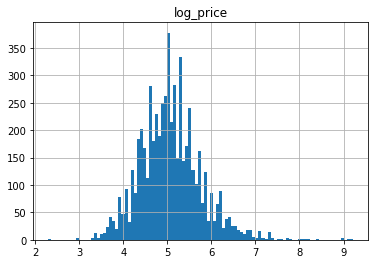

In [0]:
from pyspark.sql.functions import col, log, exp
import matplotlib.pyplot as plt

with mlflow.start_run(run_name="LR-Log-Price") as run:
    # Take log of price
    log_train_df = train_df.withColumn("log_price", log(col("price")))
    log_test_df = test_df.withColumn("log_price", log(col("price")))

    # Log parameter
    mlflow.log_param("label", "log_price")
    mlflow.log_param("features", "all_features")

    # Create pipeline
    r_formula = RFormula(formula="log_price ~ . - price", featuresCol="features", labelCol="log_price", handleInvalid="skip")  
    lr = LinearRegression(labelCol="log_price", predictionCol="log_prediction")
    pipeline = Pipeline(stages=[r_formula, lr])
    pipeline_model = pipeline.fit(log_train_df)

    # Log model
    mlflow.spark.log_model(pipeline_model, "log-model", input_example=log_train_df.limit(5).toPandas())

    # Make predictions
    pred_df = pipeline_model.transform(log_test_df)
    exp_df = pred_df.withColumn("prediction", exp(col("log_prediction")))

    # Evaluate predictions
    rmse = regression_evaluator.setMetricName("rmse").evaluate(exp_df)
    r2 = regression_evaluator.setMetricName("r2").evaluate(exp_df)

    # Log metrics
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)

    # Log artifact
    plt.clf()

    log_train_df.toPandas().hist(column="log_price", bins=100)
    fig = plt.gcf()
    mlflow.log_figure(fig, username + "_log_normal.png")
    plt.show()

#### That's it! Now, let's use MLflow to easily look over our work and compare model performance. You can either query past runs programmatically or use the MLflow UI.

### Querying Past Runs

You can query past runs programmatically in order to use this data back in Python.  The pathway to doing this is an **`MlflowClient`** object. 

### API Output

In [0]:
from mlflow.tracking import MlflowClient

client = MlflowClient()

In [0]:
client.list_experiments()

Out[12]: [<Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/05ce6800a182415abd6e0641579d0e78', experiment_id='05ce6800a182415abd6e0641579d0e78', lifecycle_stage='active', name=('/Repos/medhavi.chaturvedi@celebaltech.com/scalable-machine-learning-with-apache-spark/Scalable-Machine-Learning-with-Apache-Spark/ML '
 '05 - MLflow Model Registry'), tags={'mlflow.experiment.sourceId': '727928812679674',
 'mlflow.experiment.sourceName': '/Repos/medhavi.chaturvedi@celebaltech.com/scalable-machine-learning-with-apache-spark/Scalable-Machine-Learning-with-Apache-Spark/ML '
 '05 - MLflow Model Registry',
 'mlflow.experiment.sourceType': 'REPO_NOTEBOOK',
 'mlflow.ownerEmail': 'medhavi.chaturvedi@celebaltech.com',
 'mlflow.ownerId': '3477723637607304'}>,
 <Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/2051889157726802', experiment_id='2051889157726802', lifecycle_stage='active', name=('/Users/manujkumar.joshi@celebaltech.com/Scalable-Machine-Learning-with-Apache-Spark/ML '
 '04 - MLflow Tracking'), tags={'mlflow.experiment.sourceName': '/Users/manujkumar.joshi@celebaltech.com/Scalable-Machine-Learning-with-Apache-Spark/ML '
 '04 - MLflow Tracking',
 'mlflow.experimentType': 'NOTEBOOK',
 'mlflow.ownerEmail': 'manujkumar.joshi@celebaltech.com',
 'mlflow.ownerId': '6997591375752473'}>]

#### You can also use <a href="https://mlflow.org/docs/latest/search-syntax.html" target="_blank">search_runs</a> to find all runs for a given experiment.

In [0]:
experiment_id = run.info.experiment_id
runs_df = mlflow.search_runs(experiment_id)

display(runs_df)

run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.rmse,metrics.r2,params.features,params.label,tags.mlflow.databricks.cluster.id,tags.mlflow.databricks.notebookRevisionID,tags.mlflow.user,tags.mlflow.databricks.workspaceID,tags.mlflow.databricks.workspaceURL,tags.mlflow.databricks.notebookPath,tags.mlflow.source.name,tags.mlflow.runName,tags.mlflow.databricks.notebookID,tags.mlflow.source.type,tags.mlflow.log-model.history,tags.mlflow.databricks.cluster.info,tags.mlflow.databricks.notebook.commandID,tags.mlflow.databricks.webappURL,tags.mlflow.databricks.cluster.libraries
f01bdd95dc6b49b296913158a15f798b,2051889157726802,FINISHED,dbfs:/databricks/mlflow-tracking/2051889157726802/f01bdd95dc6b49b296913158a15f798b/artifacts,2022-08-26T03:49:57.104+0000,2022-08-26T03:52:24.468+0000,129.3688777666016,0.4753471889490146,all_features,log_price,0822-094520-n0irdqef,1661485944667,manujkumar.joshi@celebaltech.com,2542766428318180,adb-2542766428318180.0.azuredatabricks.net,/Users/manujkumar.joshi@celebaltech.com/Scalable-Machine-Learning-with-Apache-Spark/ML 04 - MLflow Tracking,/Users/manujkumar.joshi@celebaltech.com/Scalable-Machine-Learning-with-Apache-Spark/ML 04 - MLflow Tracking,LR-Log-Price,2051889157726802,NOTEBOOK,"[{""artifact_path"":""log-model"",""saved_input_example_info"":{""artifact_path"":""input_example.json"",""type"":""dataframe"",""pandas_orient"":""split""},""flavors"":{""spark"":{""pyspark_version"":""3.2.1"",""model_data"":""sparkml"",""code"":null},""python_function"":{""loader_module"":""mlflow.spark"",""python_version"":""3.8.10"",""data"":""sparkml"",""env"":""conda.yaml""}},""run_id"":""f01bdd95dc6b49b296913158a15f798b"",""model_uuid"":""6177de9a116842eca598cb85dc1ccd50"",""utc_time_created"":""2022-08-26 03:51:11.190661"",""mlflow_version"":""1.28.0"",""databricks_runtime"":""10.4.x-scala2.12""}]","{""cluster_name"":""AjeetSingh Charan's Cluster"",""spark_version"":""10.4.x-scala2.12"",""node_type_id"":""Standard_D3_v2"",""driver_node_type_id"":""Standard_D3_v2"",""autotermination_minutes"":120,""disk_spec"":{},""autoscale"":{""min_workers"":0,""max_workers"":1,""target_workers"":0}}",4791838035253479795_8191540757686029434_711299b0f345406fa5a7496b385613ac,https://centralindia.azuredatabricks.net,"{""installable"":[],""redacted"":[]}"
a4da71104dc14ef89dc4ec63a2e873d8,2051889157726802,FINISHED,dbfs:/databricks/mlflow-tracking/2051889157726802/a4da71104dc14ef89dc4ec63a2e873d8/artifacts,2022-08-26T03:45:57.743+0000,2022-08-26T03:48:21.437+0000,133.46320441927344,0.4416127690314602,all_features,price,0822-094520-n0irdqef,1661485701586,manujkumar.joshi@celebaltech.com,2542766428318180,adb-2542766428318180.0.azuredatabricks.net,/Users/manujkumar.joshi@celebaltech.com/Scalable-Machine-Learning-with-Apache-Spark/ML 04 - MLflow Tracking,/Users/manujkumar.joshi@celebaltech.com/Scalable-Machine-Learning-with-Apache-Spark/ML 04 - MLflow Tracking,LR-All-Features,2051889157726802,NOTEBOOK,"[{""artifact_path"":""model"",""saved_input_example_info"":{""artifact_path"":""input_example.json"",""type"":""dataframe"",""pandas_orient"":""split""},""flavors"":{""spark"":{""pyspark_version"":""3.2.1"",""model_data"":""sparkml"",""code"":null},""python_function"":{""loader_module"":""mlflow.spark"",""python_version"":""3.8.10"",""data"":""sparkml"",""env"":""conda.yaml""}},""run_id"":""a4da71104dc14ef89dc4ec63a2e873d8"",""model_uuid"":""4132d9ed89bf4eb58b58e60368a83647"",""utc_time_created"":""2022-08-26 03:47:13.354320"",""mlflow_version"":""1.28.0"",""databricks_runtime"":""10.4.x-scala2.12""}]","{""cluster_name"":""AjeetSingh Charan's Cluster"",""spark_version"":""10.4.x-scala2.12"",""node_type_id"":""Standard_D3_v2"",""driver_node_type_id"":""Standard_D3_v2"",""autotermination_minutes"":120,""disk_spec"":{},""autoscale"":{""min_workers"":0,""max_workers"":1,""target_workers"":0}}",4791838035253479795_6415577083339566388_2e4a7152343d48fcbc03c434646b61fc,https://centralindia.azuredatabricks.net,"{""installable""

#### Pull the last run and look at metrics.

In [0]:
runs = client.search_runs(experiment_id, order_by=["attributes.start_time desc"], max_results=1)
runs[0].data.metrics

Out[14]: {'r2': 0.4753471889490146, 'rmse': 129.3688777666016}

In [0]:
runs[0].info.run_id

Out[15]: 'f01bdd95dc6b49b296913158a15f798b'

Examine the results in the UI.  Look for the following:<br><br>

1. The **`Experiment ID`**
2. The artifact location.  This is where the artifacts are stored in DBFS.
3. The time the run was executed.  **Click this to see more information on the run.**
4. The code that executed the run.


After clicking on the time of the run, take a look at the following:<br><br>

1. The Run ID will match what we printed above
2. The model that we saved, included a pickled version of the model as well as the Conda environment and the **`MLmodel`** file.

Note that you can add notes under the "Notes" tab to help keep track of important information about your models. 

Also, click on the run for the log normal distribution and see that the histogram is saved in "Artifacts".

### Load Saved Model
,
Let's practice <a href="https://www.mlflow.org/docs/latest/python_api/mlflow.spark.html" target="_blank">loading</a> our logged log-normal model.

In [0]:
model_path = f"runs:/{run.info.run_id}/log-model"
loaded_model = mlflow.spark.load_model(model_path)

display(loaded_model.transform(test_df))

2022/08/26 04:18:58 INFO mlflow.spark: 'runs:/f01bdd95dc6b49b296913158a15f798b/log-model' resolved as 'dbfs:/databricks/mlflow-tracking/2051889157726802/f01bdd95dc6b49b296913158a15f798b/artifacts/log-model'

-sandbox
&copy; 2022 Databricks, Inc. All rights reserved.<br/>
Apache, Apache Spark, Spark and the Spark logo are trademarks of the <a href="https://www.apache.org/">Apache Software Foundation</a>.<br/>
<br/>
<a href="https://databricks.com/privacy-policy">Privacy Policy</a> | <a href="https://databricks.com/terms-of-use">Terms of Use</a> | <a href="https://help.databricks.com/">Support</a>